<a href="https://colab.research.google.com/github/rmccormick-contractor/GHISA_Spectral_Visualization_App/blob/main/GHISA_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


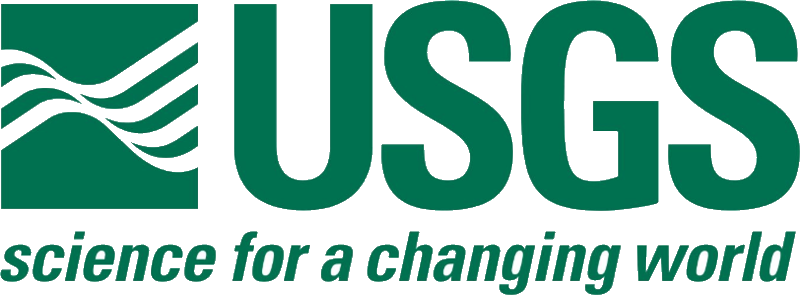

<h1><u><b><font color="#00824a">GHISA Visualization Application</font></u></b></h1>

Use this application to visualize GHISA spectral data available to download from LP DAAC.


<h2><b><font color="#00824a">Links to LP DAAC & GHISA Resources:</font></b></h2>
<ul>
<li><a href="https://lpdaac.usgs.gov/products/ghisaconusv001/">GHISA CONUS</a></li>

<li><a href="https://lpdaac.usgs.gov/products/ghisacasiav001/">GHISA Central Asia</a></li>

<li><a href="https://www.usgs.gov/centers/western-geographic-science-center/science/global-hyperspectral-imaging-spectroscopy">GHISA Main Website</a></li>



<li><a href="https://www.sciencebase.gov/catalog/item/62a91cc2d34ec53d2770f06d">ScienceBase: PRISMA and DESIS Data</a></li>
</ul>

<h2><b><font color="#00824a">Attributions:</font></b></h2>

**Itiya Aneece** \
Research Geographer \
United States Geological Survey

**Prasad Thenkabail** \
Research Geographer \
United States Geological Survey

**Isabella Mariotto** \
Remote Sensing-GIS Scientist & Ecologist \
Terra Sensing Lab LLC

**Adam Oliphant** \
Geographer \
United States Geological Survey \

**Daniel Foley** \
Geographer \
United States Geological Survey \

**Pardhasaradhi Teluguntla** \
Research Scientist \
Bay Area Environmental Research Institute \

**Richard McCormick** \
Student Programming Contractor \
United States Geological Survey

In [1]:
%%capture

# if on Google CoLab, install packages into base environment
import os
import sys

if sys.version_info.major == 3 and sys.version_info.minor >= 10:
  import collections
  setattr(collections, "MutableMapping", collections.abc.MutableMapping)

if 'COLAB_GPU' in list(os.environ):
    #@title 1. First Time Requirement Installation
    #@markdown Downloads and installs required packages. Click 'Runtime > Restart Runtime' once complete. (~1 minute)
    #First time setup - Installs all required components
    !pip install geemap -U &> /dev/null
    !pip install ipyleaflet -U &> /dev/null
    !pip install ipywidgets -U &> /dev/null
    !pip install ipympl -U &> /dev/null
    !pip install npm -U &> /dev/null
    !pip install panel -U &> /dev/null
    !pip install hvplot -U &> /dev/null
    !pip install tornado==5.1.1 -U &> /dev/null
    !pip install geemap -U &> /dev/null
    !pip install geopandas -U &> /dev/null
    !pip install geoviews -U &> /dev/null
    !pip uninstall shapely -U &> /dev/null
    !pip install shapely --no-binary shapely -U &> /dev/null
    !pip install config
    !pip install typing-extensions bleach markdown param requests pyviz-comms bokeh pyct tqdm setuptools -U /dev/null
    !pip install -U rioxarray
    !pip install -U earthpy


    !pip install --upgrade tornado
    !pip install --upgrade holoviews
    !pip install --upgrade hvplot

    # RESTART KERNEL AFTER THIS CODE HAS BEEN RUN

In [3]:
#@title 2. Import Dependencies & Data
#@markdown Imports and activates required packages, as well as all source data. (~1 minute)
#Import dependencies
import pandas as pd
import numpy as np
import geopy
import geemap
import ee
import config
import jinja2
import hvplot.pandas
import holoviews as hv
import geopandas as gpd
import geoviews as gv
import panel as pn

print("Loading ASD / Hyperion data...")

#Begin importing data
core_data = pd.read_csv(r'https://raw.githubusercontent.com/rmccormick-contractor/Hyperion-ASD-Visualization/main/Croplands_DataViz/asd_long.csv',
                     low_memory=False, index_col=False, na_values='NaN')
new_df2 = pd.read_csv(r'https://raw.githubusercontent.com/rmccormick-contractor/Hyperion-ASD-Visualization/main/Croplands_DataViz/hyp1_long.csv',
                      low_memory=False, index_col=False, na_values='NaN')
new_df2_1 = pd.read_csv(r'https://raw.githubusercontent.com/rmccormick-contractor/Hyperion-ASD-Visualization/main/Croplands_DataViz/hyp2_1_long.csv',
                        low_memory=False, index_col=False, na_values='NaN')
new_df3 = pd.read_csv(r'https://raw.githubusercontent.com/rmccormick-contractor/Hyperion-ASD-Visualization/main/Croplands_DataViz/hyp2_long.csv',
                      low_memory=False, index_col=False, na_values='NaN')
new_df4 = pd.read_csv(r'https://raw.githubusercontent.com/rmccormick-contractor/Hyperion-ASD-Visualization/main/Croplands_DataViz/hyp3_long.csv',
                      low_memory=False, index_col=False, na_values='NaN')
new_df5 = pd.read_csv(r'https://raw.githubusercontent.com/rmccormick-contractor/Hyperion-ASD-Visualization/main/Croplands_DataViz/hyp4_long.csv',
                      low_memory=False, index_col=False, na_values='NaN')
new_df6 = pd.read_csv(r'https://raw.githubusercontent.com/rmccormick-contractor/Hyperion-ASD-Visualization/main/Croplands_DataViz/hyp5_long.csv',
                      low_memory=False, index_col=False, na_values='NaN')
new_df7 = pd.read_csv(r'https://raw.githubusercontent.com/rmccormick-contractor/Hyperion-ASD-Visualization/main/Croplands_DataViz/hyperion2012_long.csv',
                      low_memory=False, index_col=False, na_values='NaN')
new_df8 = pd.read_csv(r'https://raw.githubusercontent.com/rmccormick-contractor/Hyperion-ASD-Visualization/main/Croplands_DataViz/ground2011_long-part1.csv',
                      low_memory=False, index_col=False, na_values='NaN')
new_df9 = pd.read_csv(r'https://raw.githubusercontent.com/rmccormick-contractor/Hyperion-ASD-Visualization/main/Croplands_DataViz/ground2011_long-part2.csv',
                      low_memory=False, index_col=False, na_values='NaN')
new_df10 = pd.read_csv(r'https://raw.githubusercontent.com/rmccormick-contractor/Hyperion-ASD-Visualization/main/Croplands_DataViz/ground2011_long-part3.csv',
                      low_memory=False, index_col=False, na_values='NaN')
new_df11 = pd.read_csv(r'https://raw.githubusercontent.com/rmccormick-contractor/Hyperion-ASD-Visualization/main/Croplands_DataViz/ground2012_long-part1.csv',
                      low_memory=False, index_col=False, na_values='NaN')
new_df12 = pd.read_csv(r'https://raw.githubusercontent.com/rmccormick-contractor/Hyperion-ASD-Visualization/main/Croplands_DataViz/ground2012_long-part2.csv',
                      low_memory=False, index_col=False, na_values='NaN')
new_df13 = pd.read_csv(r'https://raw.githubusercontent.com/rmccormick-contractor/Hyperion-ASD-Visualization/main/Croplands_DataViz/ground2012_long-part3.csv',
                      low_memory=False, index_col=False, na_values='NaN')

# Concat all dataframes into one single
core_data = pd.concat([core_data, new_df2])
core_data = pd.concat([core_data, new_df2_1])
core_data = pd.concat([core_data, new_df3])
core_data = pd.concat([core_data, new_df4])
core_data = pd.concat([core_data, new_df5])
core_data = pd.concat([core_data, new_df6])
core_data = pd.concat([core_data, new_df7])
core_data = pd.concat([core_data, new_df8])
core_data = pd.concat([core_data, new_df9])
core_data = pd.concat([core_data, new_df10])
core_data = pd.concat([core_data, new_df11])
core_data = pd.concat([core_data, new_df12])
core_data = pd.concat([core_data, new_df13])

new_df14 = pd.read_csv(r'https://raw.githubusercontent.com/rmccormick-contractor/Hyperion-ASD-Visualization/main/Croplands_DataViz/Quemada_Daughtry_2016_long-1.csv',
                      low_memory=False, index_col=False, na_values='NaN')
new_df15 = pd.read_csv(r'https://raw.githubusercontent.com/rmccormick-contractor/Hyperion-ASD-Visualization/main/Croplands_DataViz/Quemada_Daughtry_2016_long-2.csv',
                      low_memory=False, index_col=False, na_values='NaN')
new_df16 = pd.read_csv(r'https://raw.githubusercontent.com/rmccormick-contractor/Hyperion-ASD-Visualization/main/Croplands_DataViz/Quemada_Daughtry_2016_long-3.csv',
                      low_memory=False, index_col=False, na_values='NaN')
new_df17 = pd.read_csv(r'https://raw.githubusercontent.com/rmccormick-contractor/Hyperion-ASD-Visualization/main/Croplands_DataViz/Quemada_Daughtry_2016_long-4.csv',
                      low_memory=False, index_col=False, na_values='NaN')
new_df18 = pd.read_csv(r'https://raw.githubusercontent.com/rmccormick-contractor/Hyperion-ASD-Visualization/main/Croplands_DataViz/Quemada_Daughtry_2016_long-5.csv',
                      low_memory=False, index_col=False, na_values='NaN')
new_df19 = pd.read_csv(r'https://raw.githubusercontent.com/rmccormick-contractor/Hyperion-ASD-Visualization/main/Croplands_DataViz/Quemada_Daughtry_2016_long-6.csv',
                      low_memory=False, index_col=False, na_values='NaN')
new_df20 = pd.read_csv(r'https://raw.githubusercontent.com/rmccormick-contractor/Hyperion-ASD-Visualization/main/Croplands_DataViz/Quemada_Daughtry_2016_long-7.csv',
                      low_memory=False, index_col=False, na_values='NaN')

core_data2 = pd.concat([new_df14, new_df15])
core_data2 = pd.concat([core_data2, new_df16])
core_data2 = pd.concat([core_data2, new_df17])
core_data2 = pd.concat([core_data2, new_df18])
core_data2 = pd.concat([core_data2, new_df19])
core_data2 = pd.concat([core_data2, new_df20])

core_data2.rename(columns={'Lon':'Long', 'GrowthStage':'Stage'}, inplace=True)

core_data = pd.concat([core_data, core_data2])

print("Loaded ASD / Hyperion data.\n")



core_data['Reflectance'] = core_data['Reflectance'].fillna(0)

print("Loading DESIS data...")

# DESIS Data
desis1_df = pd.read_csv(r'https://raw.githubusercontent.com/rmccormick-contractor/Hyperion-ASD-Visualization/main/Croplands_DataViz/GHISA-DESIS-Data/Part1-desis_ghisa_vis_long.csv',
                     low_memory=False, index_col=False, na_values='NaN')
desis2_df = pd.read_csv(r'https://raw.githubusercontent.com/rmccormick-contractor/Hyperion-ASD-Visualization/main/Croplands_DataViz/GHISA-DESIS-Data/Part2-desis_ghisa_vis_long.csv',
                     low_memory=False, index_col=False, na_values='NaN')
desis3_df = pd.read_csv(r'https://raw.githubusercontent.com/rmccormick-contractor/Hyperion-ASD-Visualization/main/Croplands_DataViz/GHISA-DESIS-Data/Part3-desis_ghisa_vis_long.csv',
                     low_memory=False, index_col=False, na_values='NaN')
desis4_df = pd.read_csv(r'https://raw.githubusercontent.com/rmccormick-contractor/Hyperion-ASD-Visualization/main/Croplands_DataViz/GHISA-DESIS-Data/Part4-desis_ghisa_vis_long.csv',
                     low_memory=False, index_col=False, na_values='NaN')
desis5_df = pd.read_csv(r'https://raw.githubusercontent.com/rmccormick-contractor/Hyperion-ASD-Visualization/main/Croplands_DataViz/GHISA-DESIS-Data/Part5-desis_ghisa_vis_long.csv',
                     low_memory=False, index_col=False, na_values='NaN')

print("Loaded DESIS data.\n")

core_data = pd.concat([core_data, desis1_df])
core_data = pd.concat([core_data, desis2_df])
core_data = pd.concat([core_data, desis3_df])
core_data = pd.concat([core_data, desis4_df])
core_data = pd.concat([core_data, desis5_df])

print("Loading PRISMA data...")

#PRISMA Data
prisma1_df = pd.read_csv(r'https://raw.githubusercontent.com/rmccormick-contractor/Hyperion-ASD-Visualization/main/Croplands_DataViz/GHISA-PRISMA-Data/Part1-prisma_ghisa_vis_long.csv',
                     low_memory=False, index_col=False, na_values='NaN')
prisma2_df = pd.read_csv(r'https://raw.githubusercontent.com/rmccormick-contractor/Hyperion-ASD-Visualization/main/Croplands_DataViz/GHISA-PRISMA-Data/Part2-prisma_ghisa_vis_long.csv',
                     low_memory=False, index_col=False, na_values='NaN')
prisma3_df = pd.read_csv(r'https://raw.githubusercontent.com/rmccormick-contractor/Hyperion-ASD-Visualization/main/Croplands_DataViz/GHISA-PRISMA-Data/Part3-prisma_ghisa_vis_long.csv',
                     low_memory=False, index_col=False, na_values='NaN')

prisma_df = pd.concat([prisma1_df, prisma2_df])
prisma_df = pd.concat([prisma_df, prisma3_df])

core_data = pd.concat([core_data, prisma_df])

print("Loaded PRISMA data.\n\n")

# Drop unnessary index column
core_data = core_data.drop(core_data.iloc[:, 0:1], axis=1)

# Formatting
core_data['Month'] = core_data['Month'].replace(['NA'], 1)
core_data['Month'] = core_data['Month'].fillna(1)

core_data['JulianDay'] = core_data['JulianDay'].replace(['NA'], 1)
core_data['JulianDay'] = core_data['JulianDay'].fillna(1)

core_data['Crop'] = core_data['Crop'].str.capitalize()
month_labels = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May',
                6: 'June', 7: 'July', 8: 'August',
                9: 'September', 10: 'October', 11: 'November', 12: 'December'}

core_data['Month'] = core_data['Month'].astype(int);
core_data['Month'] = core_data['Month'].apply(lambda x: month_labels[x])

core_data['Year'] = core_data['Year'].replace(['NA'], 2011)
core_data['Year'] = core_data['Year'].fillna(2011)
core_data['Year'] = core_data['Year'].astype(int);

core_data['Sensor'] = core_data['Sensor'].replace(['ASD'], 'ASD Spectroradiometer')

core_data = core_data.convert_dtypes()
print("All data ready.")


Loading ASD / Hyperion data...
Loaded ASD / Hyperion data.

Loading DESIS data...
Loaded DESIS data.

Loading PRISMA data...
Loaded PRISMA data.


All data ready.


In [4]:
#@title 3. Create Widget Panel
#@markdown Generates a panel to allow the user to filter information.

#@markdown Click a button to select that input. A selected input will become dark. Click again to deselect.

#@markdown This cell only needs to be run once.
import os

if 'COLAB_GPU' in list(os.environ):
    pn.extension(comms='colab')

# <------------ CROPS ------------------------>
crop_radio_group = pn.widgets.CheckButtonGroup(
    name='Crop Select',
    options=[
        'All',
        'Alfalfa',
        'Almonds',
        'Cotton',
        'Corn',
        'Grapes',
        'Pistachios',
        'Rice',
        'Soybean',
        'Tomatoes',
        'Wheat',
        'Winter Wheat'
        ],
    button_type='success',
    value=['Corn'])

# <------------ STAGE ------------------------->
stage_radio_group = pn.widgets.CheckButtonGroup(
    name='Crop Stage Select',
    options=[
        'All',
        'Soil',
        'Emerge_VEarly',
        'Early_Mid',
        'Mature_Senesc',
        'Late',
        'Harvest',
        'Critical',
        'Residue',
        ],
    button_type='success',
    value=['All'])

# <------------ YEARS ------------------------>
year_radio_group = pn.widgets.CheckButtonGroup(
    name='Year Select',
    options=[
        'All',
        2006,
        2007,
        2008,
        2009,
        2010,
        2011,
        2012,
        2013,
        2014,
        2015,
        2016,
        2017,
        2018,
        2019,
        2020
        ],
    button_type='primary',
    value=['All'])

# <------------ MONTHS ------------------------>
month_radio_group = pn.widgets.CheckButtonGroup(
    name='Month Select',
    options=[
        'All',
        'January',
        'February',
        'March',
        'April',
        'May',
        'June',
        'July',
        'August',
        'September',
        'October',
        'November',
        'December'
      ],
    button_type='primary',
    value=['All'])

# <------------ SENSORS ------------------------>
sensor_radio_group = pn.widgets.CheckButtonGroup(
    name='Sensor Select',
    options=[
        'All',
        'Hyperion',
        'ASD Spectroradiometer',
        'DESIS',
        'PRISMA'
      ],
    button_type='default',
    value=['Hyperion', 'DESIS'])

# <------------ COUNTRIES ----------------------->
country_radio_group = pn.widgets.CheckButtonGroup(
    name='Sensor Select',
    options=[
        'All',
        'USA',
        'Uzbekistan'
      ],
    button_type='warning',
    value=['All'])

# <------------ STUDY AREA ------------------------>
studyarea_radio_group = pn.widgets.CheckButtonGroup(
    name='Sensor Select',
    options=[
        'All',
        'Arizona',
        'Maryland',
        'California',
        'Indiana',
        'Kansas',
        'Oklahoma',
        'Galaba',
        'South Dakota',
        'Texas',
        'U.Yusupova',
        'Wisconsin'
      ],
    button_type='warning',
    value=['All'])


Combined_Crop_Select = pn.widgets.Select(name='Crop:',
                                         options=['All',
                                                  'Alfalfa',
                                                  'Almonds',
                                                  'Cotton',
                                                  'Corn',
                                                  'Grapes',
                                                  'Pistachios',
                                                  'Rice',
                                                  'Soybean',
                                                  'Tomatoes',
                                                  'Wheat',
                                                  'Winter Wheat'],
                                        value='Corn')
Combined_Crop_Select

Combined_Stage_Select = pn.widgets.Select(
    name='Growth Stage:',
    options=['All',
             'Soil',
             'Emerge_VEarly',
             'Early_Mid',
             'Mature_Senesc',
             'Late',
             'Harvest',
             'Critical',
             'Residue']
)

Year_Range_Slider = pn.widgets.RangeSlider(
    name='Select Year(s)', start=2006, end=2020, step=1)

Month_Range_Slider = pn.widgets.RangeSlider(
    name='Select Month(s)', start=1, end=12, step=1)

Day_Range_Slider = pn.widgets.RangeSlider(
    name='Select Julian Day(s)', start=1, end=365, step=1)

AEZ_Global_Select = pn.widgets.IntSlider(name='AEZ (Global, 0 for all)', start=0, end=74)

Country_Select = pn.widgets.Select(name='Country:',
                                   options=['All',
                                            'USA',
                                            'Uzbekistan'],
                                    value='Uzbekistan')

State_Select = pn.widgets.Select(
    name='Study Area:',
    options=['All',
             'Arizona',
             'California',
             'Indiana',
             'Kansas',
             'Oklahoma',
             'Galaba',
             'South Dakota',
             'Texas',
             'U.Yusupova',
             'Wisconsin']
)


Sensor_Select = pn.widgets.Select(name='Sensor:', options=['All',
                                                           'Hyperion',
                                                           'ASD Spectroradiometer',
                                                           'DESIS',
                                                           'PRISMA'],
                                  value='ASD Spectroradiometer')


    #   pn.WidgetBox(Sensor_Select, Combined_Crop_Select, Combined_Stage_Select),
     #  pn.WidgetBox(Year_Range_Slider, Month_Range_Slider, Day_Range_Slider),
    #   pn.WidgetBox(AEZ_Global_Select, Country_Select, State_Select),

pn.Column(crop_radio_group,
          stage_radio_group,
          year_radio_group,
          month_radio_group,
          studyarea_radio_group,
          country_radio_group,
          sensor_radio_group,
       pn.WidgetBox(AEZ_Global_Select, Day_Range_Slider),

)

Column
    [0] CheckButtonGroup(button_type='success', name='Crop Select', options=['All', 'Alfalfa', ...], value=['Corn'])
    [1] CheckButtonGroup(button_type='success', name='Crop Stage Select', options=['All', 'Soil', ...], value=['All'])
    [2] CheckButtonGroup(button_type='primary', name='Year Select', options=['All', 2006, ...], value=['All'])
    [3] CheckButtonGroup(button_type='primary', name='Month Select', options=['All', 'January', ...], value=['All'])
    [4] CheckButtonGroup(button_type='warning', name='Sensor Select', options=['All', 'Arizona', ...], value=['All'])
    [5] CheckButtonGroup(button_type='warning', name='Sensor Select', options=['All', 'USA', ...], value=['All'])
    [6] CheckButtonGroup(name='Sensor Select', options=['All', 'Hyperion', ...], value=['Hyperion', 'DESIS'])
    [7] WidgetBox
        [0] IntSlider(end=74, name='AEZ (Global, 0 for all)')
        [1] RangeSlider(end=365, name='Select Julian Day(s)', start=1, step=1, value=(1, 365), value_end=365, value_start=1)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
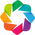


14183 unique profiles found matching this query.


,MasterID,Sensor,FID,UniqueID,Country,Global_AEZ,StudyArea,PlotID,USA_AEZ,Image,...,Long,Lat,Crop,Stage,Wavelength,Reflectance,Residue_Cover_%,Residue_RWC,Soil_RWC,RWC
0,1,ASD Spectroradiometer,<NA>,1,Uzbekistan,47,Galaba,C1A,<NA>,<NA>,...,<NA>,<NA>,Cotton,<NA>,351.0,7.254877,<NA>,<NA>,<NA>,<NA>
361,1,ASD Spectroradiometer,<NA>,1,Uzbekistan,47,Galaba,C1A,<NA>,<NA>,...,<NA>,<NA>,Cotton,<NA>,361.0,7.544738,<NA>,<NA>,<NA>,<NA>
722,1,ASD Spectroradiometer,<NA>,1,Uzbekistan,47,Galaba,C1A,<NA>,<NA>,...,<NA>,<NA>,Cotton,<NA>,371.0,7.935043,<NA>,<NA>,<NA>,<NA>
1083,1,ASD Spectroradiometer,<NA>,1,Uzbekistan,47,Galaba,C1A,<NA>,<NA>,...,<NA>,<NA>,Cotton,<NA>,381.0,8.621982,<NA>,<NA>,<NA>,<NA>
1444,1,ASD Spectroradiometer,<NA>,1,Uzbekistan,47,Galaba,C1A,<NA>,<NA>,...,<NA>,<NA>,Cotton,<NA>,391.0,9.340252,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36691,3005707,Hyperion,<NA>,RIWIL10.1.2012,USA,5,California,RIWIL10,<NA>,<NA>,...,<NA>,<NA>,Rice,<NA>,2315.0,3.268,<NA>,<NA>,<NA>,<NA>
36934,3005707,Hyperion,<NA>,RIWIL10.1.2012,USA,5,California,RIWIL10,<NA>,<NA>,...,<NA>,<NA>,Rice,<NA>,2325.0,4.836,<NA>,<NA>,<NA>,<NA>
37177,3005707,Hyperion,<NA>,RIWIL10.1.2012,USA,5,California,RIWIL10,<NA>,<NA>,...,<NA>,<NA>,Rice,<NA>,2335.0,5.206,<NA>,<NA>,<NA>,<NA>
37420,3005707,Hyperion,<NA>,RIWIL10.1.2012,USA,5,California,RIWIL10,<NA>,<NA>,...,<NA>,<NA>,Rice,<NA>,2345.0,4.188,<NA>,<NA>,<NA>,<NA>


In [5]:
#@title 4. Generate Dataframe from User Selection
#@markdown Creates a dataframe and populates it with data only fitting user selection.

#@markdown Run for each new query.

new_df = core_data

new_df['Crop'] = new_df['Crop'].replace(['Maize'], 'Corn')
new_df['Sensor'] = new_df['Sensor'].replace(['ASD'], 'ASD Spectroradiometer')

# Filter on Crop & Growth Stage
if (crop_radio_group.value != ['All']):
    new_df = new_df[new_df['Crop'].isin(crop_radio_group.value)]
if (stage_radio_group.value != ['All']):
    new_df = new_df[new_df['Stage'].isin(stage_radio_group.value)]

# Filter based on Year range
if (year_radio_group.value != ['All']):
    new_df = new_df[new_df['Year'].isin(year_radio_group.value)]

# Filter based on Month range
if (month_radio_group.value != ['All']):
    new_df = new_df[new_df['Month'].isin(month_radio_group.value)]

# Filter based on Julian Day range
new_df = new_df.loc[(new_df['JulianDay'].values >= Day_Range_Slider.value[0])]
new_df = new_df.loc[(new_df['JulianDay'].values <= Day_Range_Slider.value[1])]

# Filter based on GAEZ
if (AEZ_Global_Select.value != 0):
    new_df["Global_AEZ"] = pd.to_numeric(new_df["Global_AEZ"], errors='coerce').astype('int')
    new_df = new_df.loc[(new_df['Global_AEZ'].values == AEZ_Global_Select.value)]

# Filter based on Sensor
if (sensor_radio_group.value != ['All']):
    new_df = new_df[new_df['Sensor'].isin(sensor_radio_group.value)]

# Filter based on Study Area
if (studyarea_radio_group.value != ['All']):
    new_df = new_df[new_df['StudyArea'].isin(studyarea_radio_group.value)]

# Filter based on Country
if (country_radio_group.value != ['All']):
    new_df = new_df[new_df['Country'].isin(country_radio_group.value)]

#new_df.to_csv('selected_data')
hv.extension('bokeh')

#new_df['Reflectance'] = new_df['Reflectance'].astype('float')

#new_df = new_df.fillna(pd.NA)

new_df = new_df.sort_values(['MasterID', 'UniqueID', 'Wavelength'])
new_df['Reflectance'] = new_df['Reflectance'].replace(0.00, pd.NA)

#new_df['Reflectance']= new_df['Reflectance'].astype('float').interpolate(method='linear')

new_df = new_df[new_df.Reflectance > 0]

#new_df['Reflectance'] = np.where((new_df.Wavelength == 1336), pd.NA, new_df.Reflectance)


df_widget = pn.widgets.DataFrame(
    new_df.head(),
    name='Filtered Data',
    autosize_mode='fit_columns',
    width=1000,
    height=300)


if (new_df.empty):
    print("\nNo data found for this query. Please recheck search parameters.")
else:
    print("\n" + str(len(new_df['UniqueID'].unique())) + " unique profiles found matching this query.")

original_data = new_df

new_df['diff'] = new_df['Wavelength'].diff()
new_df['diff'] = new_df['diff'].shift(-1)

#
#replace values in 'column1' that are greater than 10 with 20
new_df.loc[new_df['diff'] > 25, 'Reflectance'] = pd.NA
new_df['diff'] = new_df['diff'].shift(1)
new_df.loc[new_df['diff'] > 25, 'Reflectance'] = pd.NA

new_df.loc[new_df['Reflectance']>100, 'Reflectance'] = pd.NA

original_data = original_data.drop(['diff'], axis=1)

from IPython.display import display, HTML
from google.colab import data_table

#data_table.enable_dataframe_formatter()

#pivot_table = original_data.pivot(index=['MasterID', 'Sensor', 'FID', 'UniqueID', 'Country', 'Global_AEZ', 'StudyArea', 'PlotID', 'USA_AEZ', 'Image', 'Month', 'Year', 'JulianDay', 'Long', 'Lat', 'Crop', 'Stage'], columns='Wavelength', values='Reflectance')
display(original_data)

In [ ]:
#@title 5. Generate Plots from Dataframe
#@markdown Creates a visual plot of the individual spectral profiles in the selected data.
#@markdown This may take *quite a long time* depending on size of the query.

hv.extension('bokeh')
new_df = new_df.sort_values(by='Wavelength')

reflectance_plot = new_df.hvplot.line(
    x = "Wavelength",
    y = "Reflectance",
    by= "MasterID",
    legend=False,
    ylabel='Surface Reflectance (%)',
    xlabel='Wavelength (nm)').opts(
        fontsize={'title': 16, 'labels': 14, 'yticks': 12},
        xrotation=45,
        xticks=15)

pane = pn.panel(reflectance_plot)
pane

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
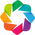

Column
    [0] Row
        [0] HoloViews(NdOverlay, height=300, sizing_mode='fixed', width=700)
        [1] HoloViews(NdOverlay, height=300, sizing_mode='fixed', width=700)
    [1] Row
        [0] HoloViews(NdOverlay, height=300, sizing_mode='fixed', width=700)
        [1] HoloViews(NdOverlay, height=300, sizing_mode='fixed', width=700)

In [18]:
#@title 6. Generate Mean Plot
#@markdown Creates plots of spectral averages by crop type from the selected data.

#@markdown Generates seperate plots for each sensor.

#@markdown **Averages from broad queries may be less informative.

import warnings
warnings.filterwarnings("ignore")




hv.extension('bokeh')

#Adds new category to ease plotting
test_df = new_df


#test_df['Reflectance'] = test_df['Reflectance'].dropna()
#test_df['crop-sensor'] = test_df[['Crop','Sensor']].agg(' - '.join, axis=1)

colors_dic =  {
    "Alfalfa" : "violet",
    "Almonds": "#7fffd4",
    "Corn" : "gold",
    "Cotton": "red",
    "Grapes": "#68228b",
    "Pistachios": "#00ee76",
    "Rice": 'cyan',
    "Soybean": 'forestgreen',
    "Tomatoes": '#cd8162',
    "Wheat": 'brown',
    "Winter Wheat": "tan",
    "Winter wheat": "tan"
}



asd_df = test_df.loc[(test_df['Sensor'].values == "ASD Spectroradiometer")]
hyperion_df = test_df.loc[(test_df['Sensor'].values == "Hyperion")]
desis_df = test_df.loc[(test_df['Sensor'].values == "DESIS")]
prisma_df = test_df.loc[(test_df['Sensor'].values == "PRISMA")]

#asd_df = asd_df.groupby(['Crop', 'Wavelength', 'Sensor'])['Reflectance'].mean()

if (asd_df.empty == False):
    asd_crops = asd_df['Crop'].unique()
    asd_crops = sorted(asd_crops)

    for crop in asd_df['Crop'].unique():
      n = 0
      new_test_df = asd_df[asd_df['Crop'].isin([crop])]
      n = len(new_test_df["MasterID"].unique())
      asd_df.loc[asd_df['Crop'] == crop, 'Crop'] = str(crop) + " (n = " + str(n) + ")"

    asd_crops_name=", ".join(map(str,asd_crops))
    if (len(asd_crops) == 1):
      asd_crops_name += " (n = " + str(len(asd_df['MasterID'].unique())) + ")"
    asd_color_list = list()
    for crop in asd_crops:
        asd_color_list.append(colors_dic[crop])

if (hyperion_df.empty == False):
    hyp_crops = hyperion_df['Crop'].unique()
    hyp_crops = sorted(hyp_crops)

    for crop in hyperion_df['Crop'].unique():
      n = 0
      new_test_df = hyperion_df[hyperion_df['Crop'].isin([crop])]
      n = len(new_test_df["MasterID"].unique())
      hyperion_df.loc[hyperion_df['Crop'] == crop, 'Crop'] = str(crop) + " (n = " + str(n) + ")"

    hyp_crops_name=", ".join(map(str,hyp_crops))
    if (len(hyp_crops) == 1):
      hyp_crops_name += " (n = " + str(len(hyperion_df['MasterID'].unique())) + ")"
    hyp_color_list = list()
    for crop in hyp_crops:
        hyp_color_list.append(colors_dic[crop])

if (desis_df.empty == False):
    desis_crops = desis_df['Crop'].unique()
    desis_crops = sorted(desis_crops)

    for crop in desis_df['Crop'].unique():
      n = 0
      new_test_df = desis_df[desis_df['Crop'].isin([crop])]
      n = len(new_test_df["MasterID"].unique())
      desis_df.loc[desis_df['Crop'] == crop, 'Crop'] = str(crop) + " (n = " + str(n) + ")"

    desis_crops_name=", ".join(map(str,desis_crops))
    if (len(desis_crops) == 1):
      desis_crops_name += " (n = " + str(len(desis_df['MasterID'].unique())) + ")"
    desis_color_list = list()
    for crop in desis_crops:
        desis_color_list.append(colors_dic[crop])

if (prisma_df.empty == False):
    prisma_crops = prisma_df['Crop'].unique()
    prisma_crops = sorted(prisma_crops)

    for crop in prisma_df['Crop'].unique():
      n = 0
      new_test_df = prisma_df[prisma_df['Crop'].isin([crop])]
      n = len(new_test_df["MasterID"].unique())
      prisma_df.loc[prisma_df['Crop'] == crop, 'Crop'] = str(crop) + " (n = " + str(n) + ")"

    prisma_crops_name=", ".join(map(str,prisma_crops))
    if (len(prisma_crops) == 1):
      prisma_crops_name += " (n = " + str(len(prisma_df['MasterID'].unique())) + ")"
    prisma_color_list = list()
    for crop in prisma_crops:
        prisma_color_list.append(colors_dic[crop])

asd_df = asd_df.groupby(['Crop', 'Wavelength'])['Reflectance'].mean()
asd_df = asd_df.dropna()
asd_df = asd_df.rolling(10).mean()

unique_selected_sensors = list()

if (asd_df.empty == False):
  asd_plot = asd_df.hvplot.line(x = "Wavelength",
                                y = "Reflectance",
                                by= ['Crop'],
                                title='Average Reflectance (ASD Spectroradiometer)',
                                ylabel='Surface Reflectance (%)',
                                xlabel='Wavelength (nm)',
                                line_color = asd_color_list).opts(fontsize={'title': 16,
                                                                        'labels': 14,
                                                                        'yticks': 12},
                                                              xrotation=45,
                                                              xticks=15)
  unique_selected_sensors.append(asd_plot)

########################################################

hyperion_df = hyperion_df.groupby(['Crop', 'Wavelength'])['Reflectance'].mean()
#hyperion_df = hyperion_df.dropna()
#hyperion_df = hyperion_df[hyperion_df.Reflectance != 0]

########################################################
if (hyperion_df.empty == False):

    hyperion_plot = hyperion_df.hvplot.line(x = "Wavelength",
                                            y = "Reflectance",
                                            by=['Crop'],
                                            title='Average Reflectance (EO1-Hyperion)',
                                            ylabel='Surface Reflectance (%)',
                                            xlabel='Wavelength (nm)',
                                            line_color=hyp_color_list).opts(fontsize={'title': 16,
                                                                                      'labels': 14,
                                                                                      'yticks': 12},
                                                                            xrotation=45,
                                                                            xticks=15)
    unique_selected_sensors.append(hyperion_plot)

desis_df = desis_df.groupby(['Crop', 'Wavelength'])['Reflectance'].mean()
desis_df = desis_df.dropna()

if (desis_df.empty == False):
    desis_plot = desis_df.hvplot.line(x = "Wavelength",
                                            y = "Reflectance",
                                            by=['Crop'],
                                            title='Average Reflectance (DESIS)',
                                            ylabel='Surface Reflectance (%)',
                                            xlabel='Wavelength (nm)',
                                            line_color=desis_color_list).opts(fontsize={'title': 16,
                                                                                      'labels': 14,
                                                                                      'yticks': 12},
                                                                            xrotation=45,
                                                                            xticks=15)
    unique_selected_sensors.append(desis_plot)

prisma_df = prisma_df.groupby(['Crop', 'Wavelength'])['Reflectance'].mean()
prisma_df = prisma_df.dropna()

if (prisma_df.empty == False):
    prisma_plot = prisma_df.hvplot.line(x = "Wavelength",
                                            y = "Reflectance",
                                            by=['Crop'],
                                            title='Average Reflectance (PRISMA)',
                                            ylabel='Surface Reflectance (%)',
                                            xlabel='Wavelength (nm)',
                                            line_color=prisma_color_list).opts(fontsize={'title': 16,
                                                                                      'labels': 14,
                                                                                      'yticks': 12},
                                                                            xrotation=45,
                                                                            xticks=15)
    unique_selected_sensors.append(prisma_plot)

if (asd_df.empty):
    asd_plot = asd_df.hvplot.line(x = "Wavelength",y = "Reflectance", title='Average Reflectance (ASD Spectroradiometer)', ylabel='Surface Reflectance (%)',xlabel='Wavelength (nm)').opts(fontsize={'title': 16, 'labels': 14, 'yticks': 12},xrotation=45,xticks=15)
if (hyperion_df.empty):
    hyperion_plot = hyperion_df.hvplot.line(x = "Wavelength",y = "Reflectance", title='Average Reflectance (EO1-Hyperion)', ylabel='Surface Reflectance (%)', xlabel='Wavelength (nm)').opts(fontsize={'title': 16, 'labels': 14, 'yticks': 12},xrotation=45, xticks=15)
if (desis_df.empty):
    desis_plot = desis_df.hvplot.line(x = "Wavelength",y = "Reflectance", title='Average Reflectance (DESIS)', ylabel='Surface Reflectance (%)', xlabel='Wavelength (nm)').opts(fontsize={'title': 16, 'labels': 14, 'yticks': 12},xrotation=45, xticks=15)
if (prisma_df.empty):
    prisma_plot = prisma_df.hvplot.line(x = "Wavelength",y = "Reflectance", title='Average Reflectance (PRISMA)', ylabel='Surface Reflectance (%)', xlabel='Wavelength (nm)').opts(fontsize={'title': 16, 'labels': 14, 'yticks': 12},xrotation=45, xticks=15)

pn.Column(
    pn.Row(hyperion_plot, asd_plot),
    pn.Row(desis_plot, prisma_plot)
    )


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
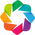

Column
    [0] WidgetBox(align=('end', 'start'))
        [0] Select(margin=(20, 20, 20, 20), name='Crop', options=['Alfalfa', 'Almonds', ...], value='Alfalfa', width=250)
    [1] HoloViews(DynamicMap, height=300, sizing_mode='fixed', widget_location='top_right', width=700)

In [46]:
#@title 7. Compare Sensor Averages
#@markdown Directly compare average reflectance of one crop type from different sensors.
hv.extension('bokeh')

mean_df = new_df
mean_df = mean_df.groupby(['Crop', 'Wavelength', 'Sensor'])['Reflectance'].mean()
mean_df = mean_df.dropna()

mean_plot = mean_df.hvplot.line(x = "Wavelength",y = "Reflectance",by='Sensor', groupby='Crop', widget_location='top_right', title='Average Reflectance', ylabel='Surface Reflectance (%)', xlabel='Wavelength (nm)')
mean_plot

In [ ]:
#@title 8. Map Selected Data
#@markdown Create an interactive map plotting all selected data.

#@markdown (Do not use with large queries!)

import geopandas as gpd
from shapely.geometry import Point, Polygon
import os
import folium
from folium import plugins
import rioxarray as rxr
import earthpy as et
import earthpy.spatial as es

pivot_table = new_df.drop_duplicates(subset=["MasterID"], keep='last')

f = folium.Figure(width=1200, height=600)
map_view = folium.Map( location=[20,0], tiles = 'OpenStreetMap', zoom_start=2, min_zoom =2 ).add_to(f)

pivot_table = pivot_table.dropna(subset=["Long"])

for i,r in pivot_table.iterrows():
    folium.Marker(location=[r['Lat'], r['Long']],
                  popup = r['Crop'] + ": Captured by " +str(r['Sensor']) + " on " + str(r['Month']) + ", " + str(r['Year'])
                  ).add_to(map_view)


f